In [26]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline


In [27]:
df = pd.read_csv("Downloads\\homeprices_banglore.csv")

In [28]:
from sklearn import preprocessing
# For Min Max Scaling , just like we define x and y axis on graph right scale same
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_X = sx.fit_transform(df.drop('price',axis='columns')) 
scaled_X
scaled_Y=sy.fit_transform(df['price'].values.reshape(df.shape[0],1))
scaled_Y.reshape(20,)

array([0.05237037, 0.65185185, 0.22222222, 0.31851852, 0.14074074,
       0.04444444, 0.76296296, 0.91111111, 0.13333333, 1.        ,
       0.37037037, 0.8       , 0.04444444, 0.05925926, 0.51111111,
       0.07407407, 0.11851852, 0.20740741, 0.51851852, 0.        ])

In [61]:

def stochasticGradientDescent(X, y_true, epochs, learning_rate = 0.01):
 
    no_of_features = X.shape[1]
    w = np.ones(shape=(no_of_features)) 
    b = 0
    total_samples = X.shape[0]
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):    
        random_index = random.randint(0,total_samples-1)
        sample_x = X[random_index]
        sample_y = y_true[random_index]
        
        y_predicted = np.dot(w, sample_x.T) + b
    
        w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
        b_grad = -(2/total_samples)*(sample_y-y_predicted)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.square(sample_y-y_predicted)
        
        if i%100==0:
            cost_list.append(cost)
            epoch_list.append(i)    
    return w, b, cost, cost_list, epoch_list

w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochasticGradientDescent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),10000)
w_sgd, b_sgd, cost_sgd


(array([0.70630281, 0.67484876]), -0.23594136326335066, 0.003199207145231048)

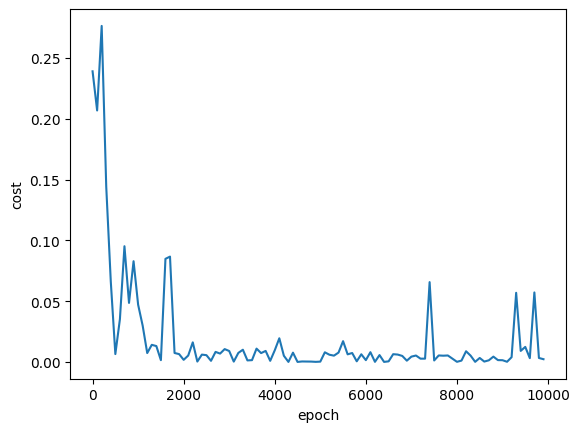

In [62]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_sgd,cost_list_sgd)

In [64]:
def predict(area, bedrooms, w, b):
    scaled_X = sx.transform([[area, bedrooms]])[0]
    scaled_price = w[0]*scaled_X[0] + w[1] * scaled_X[1] +b
    return sy.inverse_transform([[scaled_price]])[0][0]

In [65]:
#Testing
print("StochasticPredicted : ",predict(1000,2,w_sgd,b_sgd), end='\n\n')

print("Actual price ", df.loc[[0]])

StochasticPredicted :  29.49998417544334

Actual price     area  bedrooms  price
0  1056         2  39.07


C:\Users\PramodDM\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
